In [30]:
'''
S BARATH KUMAR
20BKT0019
barathkumar.s2020a@vitstudent.ac.in
VIT VELLORE
8072709703
'''

'\nS BARATH KUMAR\n20BKT0019\nbarathkumar.s2020a@vitstudent.ac.in\nVIT VELLORE\n8072709703\n'

In [31]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [32]:
#Build an ANN model for Drug classification. 

In [33]:
#Reading the Dataset from CSV file
df=pd.read_csv("/content/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [34]:
#Visualizing the Top 5 observations
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [35]:
#rows and columns
df.shape

(200, 6)

In [36]:
#data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [37]:
#descriptive statistics
df.describe(include="all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [38]:
#checking whether any missing values included in the observation or not
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

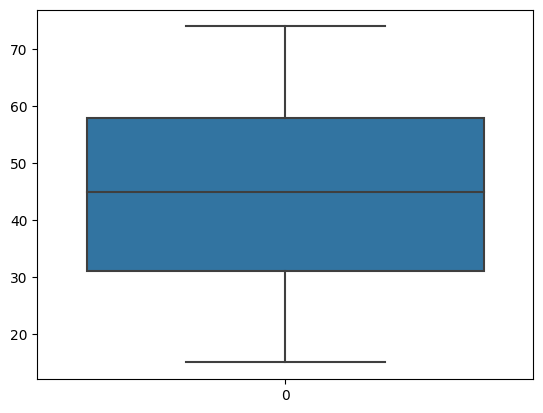

In [39]:
#checking whether the outlier is present or not in any of the feature
sns.boxplot(df['Age'])

<Axes: >

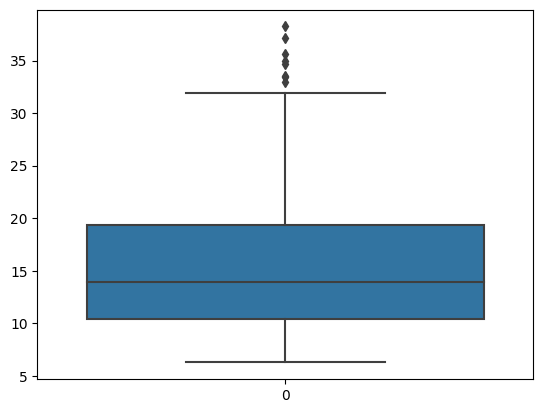

In [40]:
sns.boxplot(df["Na_to_K"])

In [41]:
#outlier removal using IQR 
q1=df.Na_to_K.quantile(0.25)
q3=df.Na_to_K.quantile(0.75)
IQR=q3-q1
upperlimit=q3+1.5*IQR

In [42]:
df=df[df.Na_to_K<upperlimit]
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [43]:
df.shape

(192, 6)

<Axes: >

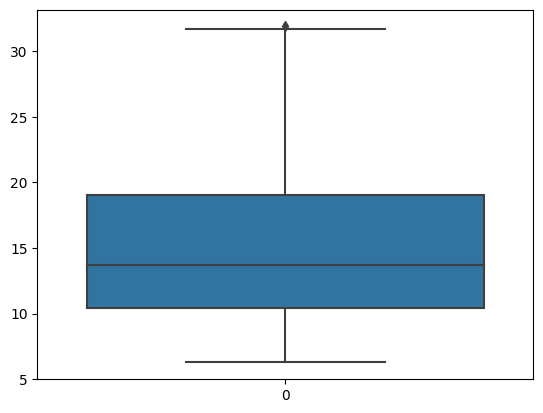

In [44]:
sns.boxplot(df.Na_to_K)

In [45]:
#outlier removal using IQR 
q1=df.Na_to_K.quantile(0.25)
q3=df.Na_to_K.quantile(0.75)
IQR=q3-q1
upperlimit=q3+1.5*IQR

In [46]:
df=df[df.Na_to_K<upperlimit]
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [47]:
df.shape

(191, 6)

<Axes: >

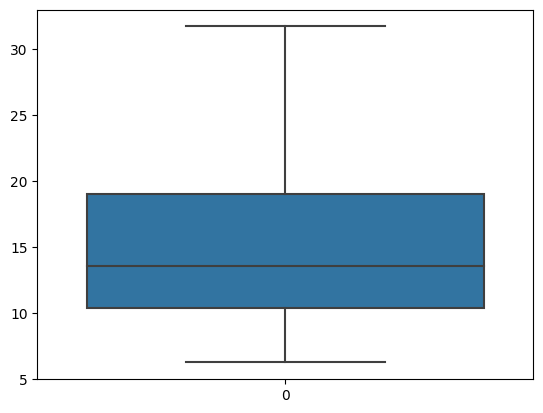

In [48]:
sns.boxplot(df.Na_to_K)

In [49]:
#check how many unique values that the target feature have?
n=df.iloc[:,-1].unique()
print(n)
print(len(n))

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
5


In [50]:
df.iloc[:,-1].value_counts()

DrugY    82
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [51]:
le1=LabelEncoder()
df=df.apply(le1.fit_transform)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,0
1,29,1,1,0,89,3
2,29,1,1,0,43,3
3,12,0,2,0,10,4
4,43,0,1,0,133,0
...,...,...,...,...,...,...
195,38,0,1,0,69,3
196,1,1,1,0,75,3
197,34,1,2,0,36,4
198,8,1,2,1,102,4


In [52]:
#Segregating the Independent feautures and dependent feature
x=df.iloc[:,0:-1].values
x

array([[  8,   0,   0,   0, 167],
       [ 29,   1,   1,   0,  89],
       [ 29,   1,   1,   0,  43],
       [ 12,   0,   2,   0,  10],
       [ 43,   0,   1,   0, 133],
       [  7,   0,   2,   0,  16],
       [ 31,   0,   2,   0, 120],
       [ 24,   1,   1,   0,  59],
       [ 42,   1,   2,   0, 111],
       [ 26,   1,   1,   1, 147],
       [ 29,   0,   1,   0,  71],
       [ 17,   0,   0,   1, 145],
       [ 26,   1,   1,   0, 112],
       [ 55,   0,   1,   0, 156],
       [ 32,   0,   2,   0,  80],
       [  1,   0,   0,   1, 116],
       [ 51,   1,   1,   1,  68],
       [ 26,   1,   0,   0, 101],
       [  8,   1,   1,   0,   5],
       [ 16,   0,   0,   1, 175],
       [ 39,   1,   1,   1, 143],
       [ 45,   1,   2,   0, 173],
       [ 29,   1,   1,   1, 187],
       [ 30,   0,   1,   0, 109],
       [ 12,   0,   0,   1, 139],
       [ 15,   1,   0,   0, 186],
       [ 31,   0,   2,   1,  25],
       [ 22,   0,   1,   1, 159],
       [ 27,   1,   1,   0, 132],
       [  3,  

In [53]:
y=pd.get_dummies(df.iloc[:,-1]).values
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0,

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [55]:
#ANN MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [71]:
model=Sequential()
model.add(Dense(300,input_dim=len(xtrain[0]),activation="relu"))

model.add(Dense(200,activation="relu"))

model.add(Dense(95,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(len(n),activation='softmax'))


In [72]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
model.fit(xtrain,ytrain,batch_size=3,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
51/51 [==============================] - 1s 8ms/step - loss: 1.6065 - accuracy: 0.5132 - val_loss: 1.2199 - val_accuracy: 0.4872
Epoch 2/20
51/51 [==============================] - 0s 4ms/step - loss: 1.1471 - accuracy: 0.5526 - val_loss: 1.2214 - val_accuracy: 0.4872
Epoch 3/20
51/51 [==============================] - 0s 4ms/step - loss: 1.2387 - accuracy: 0.5789 - val_loss: 1.2751 - val_accuracy: 0.5128
Epoch 4/20
51/51 [==============================] - 0s 7ms/step - loss: 1.0461 - accuracy: 0.5921 - val_loss: 1.5840 - val_accuracy: 0.4615
Epoch 5/20
51/51 [==============================] - 0s 7ms/step - loss: 1.0909 - accuracy: 0.5658 - val_loss: 1.2152 - val_accuracy: 0.4872
Epoch 6/20
51/51 [==============================] - 0s 7ms/step - loss: 0.9641 - accuracy: 0.5592 - val_loss: 1.3652 - val_accuracy: 0.5128
Epoch 7/20
51/51 [==============================] - 0s 7ms/step - loss: 1.0110 - accuracy: 0.5526 - val_loss: 1.3638 - val_accuracy: 0.5385
Epoch 8/20
51/51 [==

In [76]:
#categorize the test observations using a new built model
ypred=model.predict([[28,0,0,0,10.41],[34,2,1,1,3.012],[23,0,2,2,6.362]])
print(ypred)

1/1 [==============================] - 0s 99ms/step
[[4.7268797e-02 9.7269900e-02 4.8958105e-01 1.7803343e-01 1.8784674e-01]
 [1.0087333e-03 4.9320523e-02 1.7810415e-03 1.4129800e-01 8.0659163e-01]
 [2.0437132e-05 4.2862688e-05 6.6609336e-06 4.0285494e-03 9.9590153e-01]]


In [77]:
enc_classes=list(le1.classes_)
print(enc_classes)

['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']


In [78]:
op=[]
for i in ypred:
  op.append(enc_classes[list(i).index(max(i))])

print("The test input are categorized by the built model:",op)

The test input are categorized by the built model: ['drugB', 'drugX', 'drugX']
